In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
ds = pd.read_csv('sky-server.csv')

In [3]:
ds.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
ds.shape

(10000, 18)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
ds.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [7]:
ds.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Observation: - 
    
    1) Columns objid, ra, dec, u, g, r i, z, run, rerun,field, plate, mij and fiberid are skewed.
    2) Columns ra,  dec, run,field,specobjid,plate,fiberid have outliers.
    

In [8]:
sd=ds.drop('class',axis=1)

In [9]:
for i in sd.columns:
    print('Mean of column',i,'=',sd[i].mean())
    print('Standard Deviation of column',i,'=',sd[i].std())
    print('Median of column',i,'=',sd[i].median())
    print('Min of column',i,'=',sd[i].min())
    print('Max of column',i,'=',sd[i].max())
    print('\n')
    print('------------------------------------------------------------------------------------------------------------------')

Mean of column objid = 1.2376499999998423e+18
Standard Deviation of column objid = 157703.88539140928
Median of column objid = 1.23765e+18
Min of column objid = 1.23765e+18
Max of column objid = 1.23765e+18


------------------------------------------------------------------------------------------------------------------
Mean of column ra = 175.5299865838035
Standard Deviation of column ra = 47.78343941253625
Median of column ra = 180.39451394999998
Min of column ra = 8.235100497000001
Max of column ra = 260.88438179999997


------------------------------------------------------------------------------------------------------------------
Mean of column dec = 14.83614798419383
Standard Deviation of column dec = 25.21220657928434
Median of column dec = 0.40416603
Min of column dec = -5.382632499
Max of column dec = 68.54226541


------------------------------------------------------------------------------------------------------------------
Mean of column u = 18.619355357999954
Standar

In [10]:
for i in ds.columns:
    j= ds[i].nunique()
    print('Unique values in column',i,'=',j)

Unique values in column objid = 1
Unique values in column ra = 10000
Unique values in column dec = 10000
Unique values in column u = 9730
Unique values in column g = 9817
Unique values in column r = 9852
Unique values in column i = 9890
Unique values in column z = 9896
Unique values in column run = 23
Unique values in column rerun = 1
Unique values in column camcol = 6
Unique values in column field = 703
Unique values in column specobjid = 6349
Unique values in column class = 3
Unique values in column redshift = 9637
Unique values in column plate = 487
Unique values in column mjd = 355
Unique values in column fiberid = 892


As column objid and rerun contains uniique values in all rows, so we can drop both the columns.

In [11]:
ds=ds.drop('objid',axis=1)

In [12]:
ds=ds.drop('rerun',axis=1)

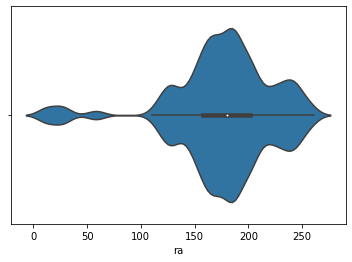

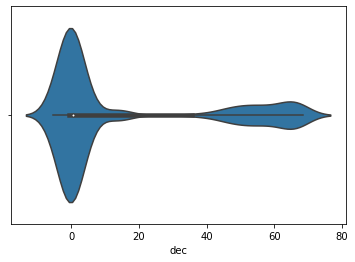

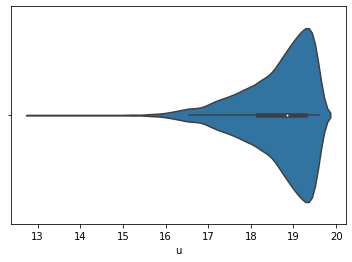

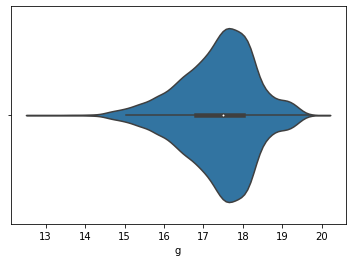

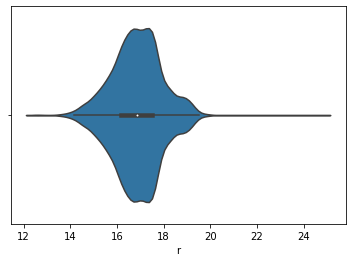

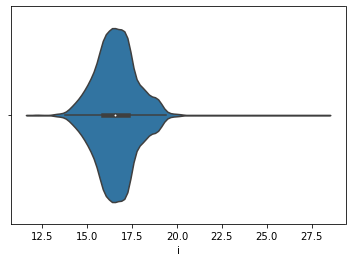

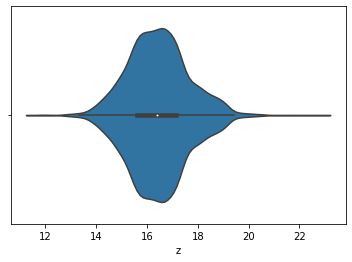

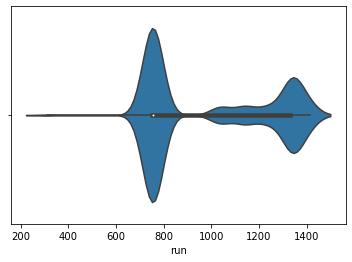

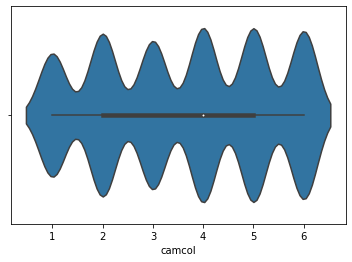

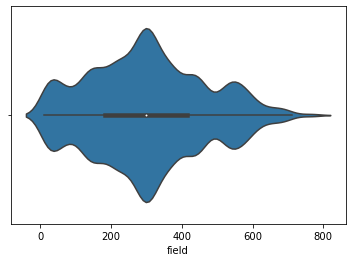

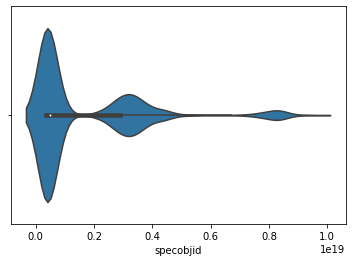

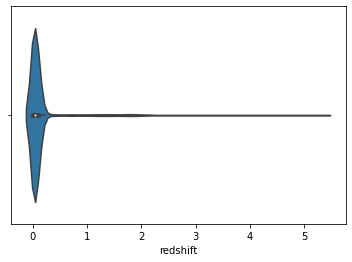

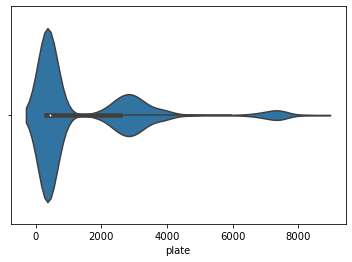

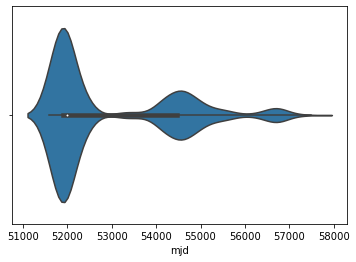

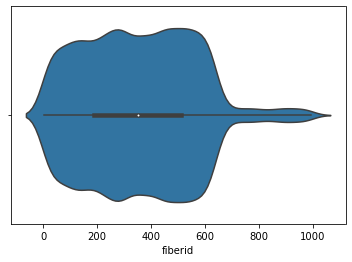

In [13]:
i = ds[['ra','dec','u','g','r','i','z','run','camcol','field','specobjid','redshift','plate','mjd','fiberid']]

for i in i:
    sns.violinplot(sd[i])
    plt.show()

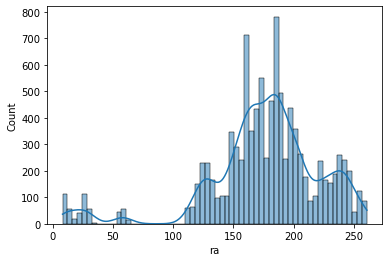

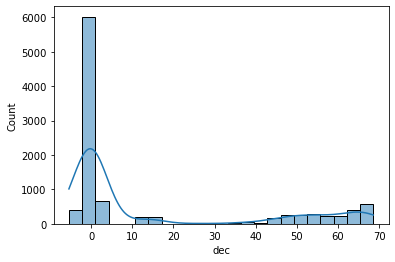

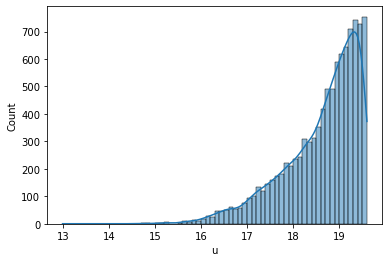

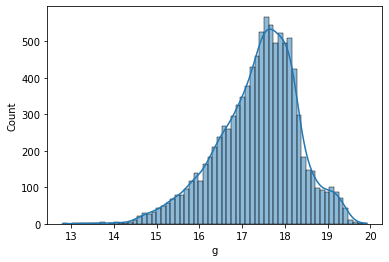

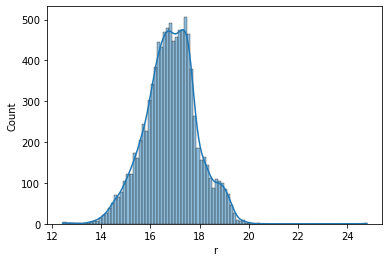

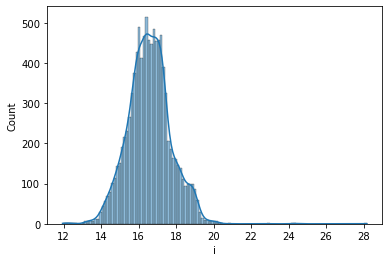

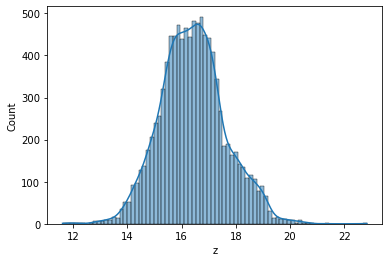

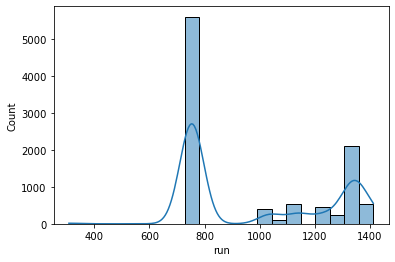

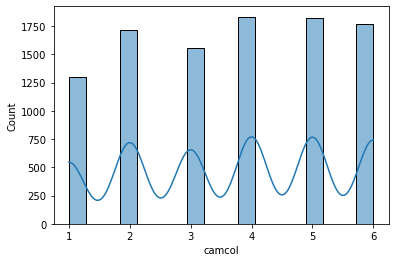

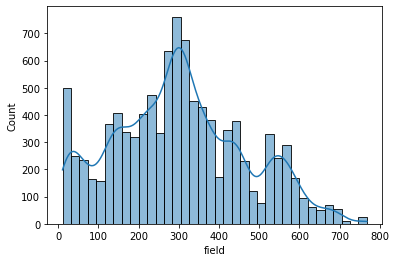

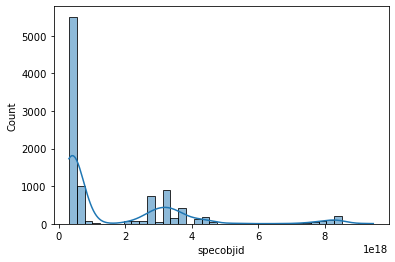

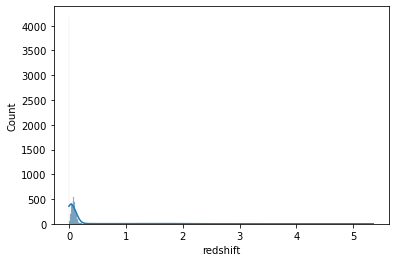

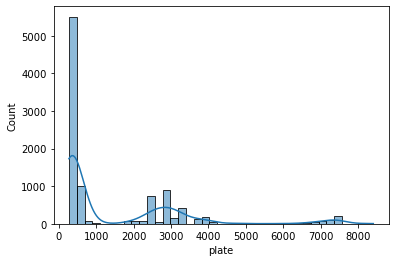

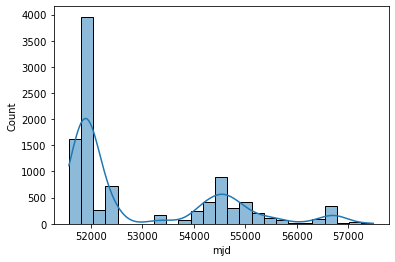

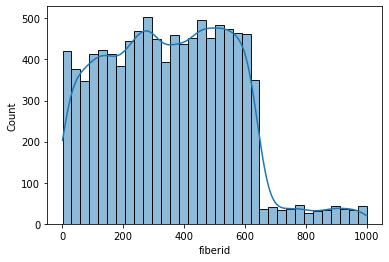

In [14]:
i = ds[['ra','dec','u','g','r','i','z','run','camcol','field','specobjid','redshift','plate','mjd','fiberid']]

for i in i:
    sns.histplot(sd[i],kde=True)
    plt.show()

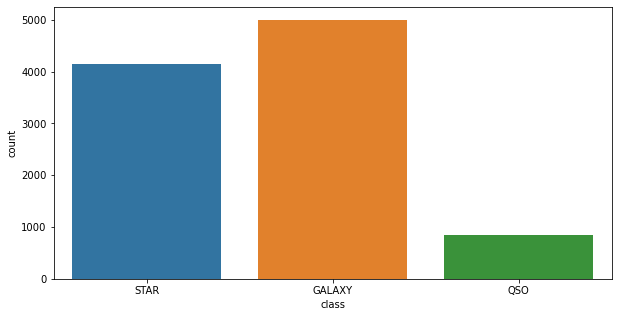

In [15]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=0)
sns.countplot(ds['class'])
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
ds['class'] = le.fit_transform(ds['class'])

In [19]:
ds['class'].unique()

array([2, 0, 1])

# CORRELATION

In [20]:
dscorr=ds.corr()
dscorr

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,-0.006294,0.594700,-0.095327,-0.043219,0.030307,-0.095329,-0.086887,0.057485
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,0.114614,-0.131471,0.088345,-0.058918,0.067021,0.088342,0.066147,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.009945,0.008548,-0.129429,-0.269044,0.163741,-0.129430,-0.168793,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.010223,0.014651,-0.054979,-0.099212,0.407576,-0.054981,-0.092772,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.010747,0.017133,0.019788,0.049628,0.441080,0.019787,-0.009345,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.013461,0.019781,0.072960,0.146791,0.431450,0.072958,0.050896,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.010930,0.018248,0.112398,0.215758,0.424034,0.112397,0.095658,0.067980
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,0.151814,-0.463898,0.093604,-0.078162,0.059056,0.093601,0.070354,0.138566
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,1.000000,-0.067921,0.040809,-0.006186,0.006834,0.040795,0.026284,0.535629
field,0.594700,-0.131471,0.008548,0.014651,0.017133,0.019781,0.018248,-0.463898,-0.067921,1.000000,-0.093724,0.007713,0.015414,-0.093723,-0.086558,-0.040493


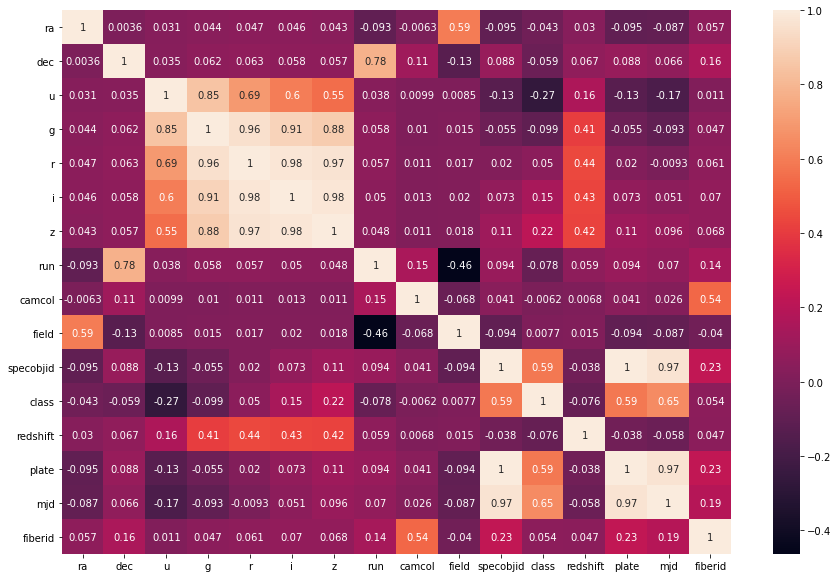

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(dscorr,annot=True)
plt.show()

Observations:
    
    1) mjd,plate,specobjid are highly correlated with our target 'class'. 
    2) z,i and r are also positively correlated with 'class'.
    3) u is negatively correlated with 'class'

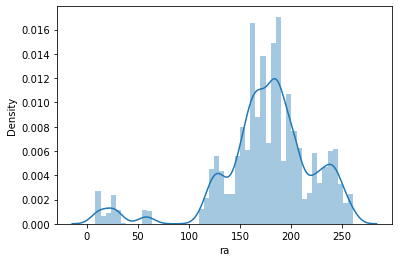

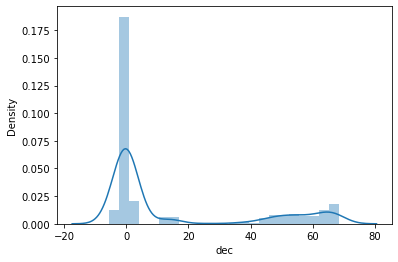

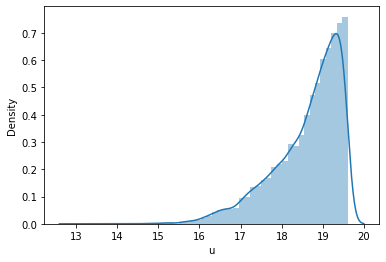

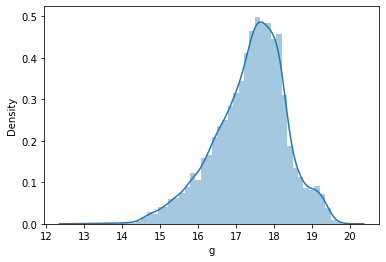

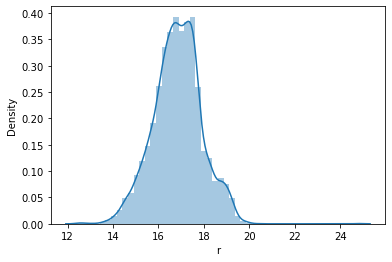

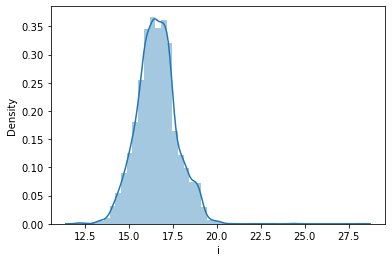

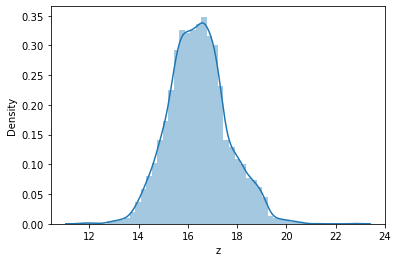

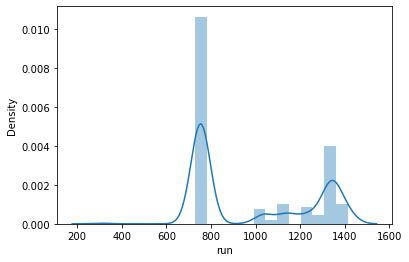

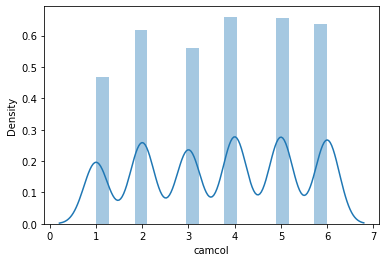

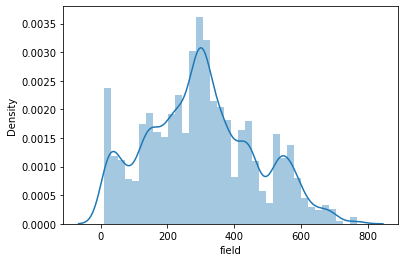

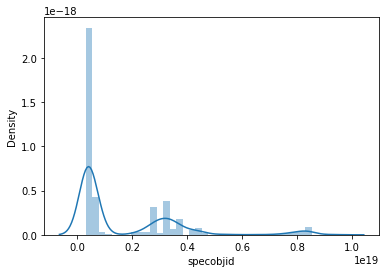

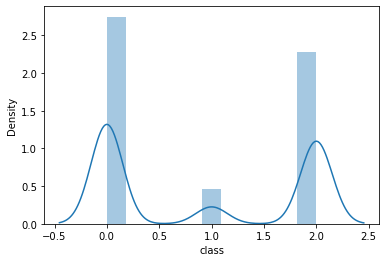

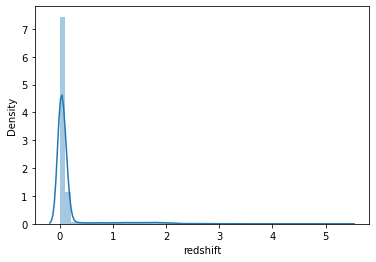

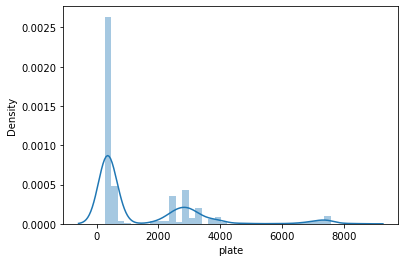

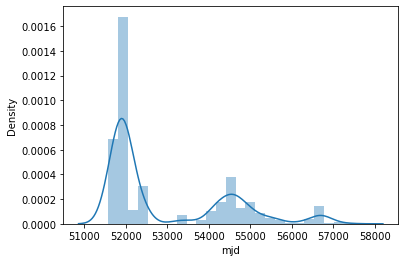

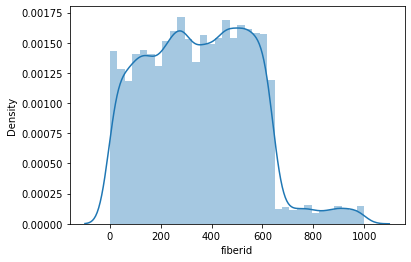

In [22]:
for i in ds.columns:
    sns.distplot(ds[i])
    plt.show()

# Checking Outliers

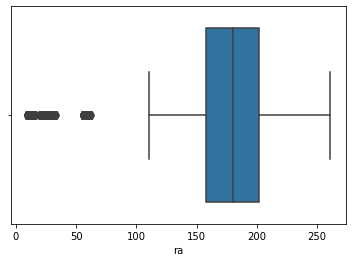

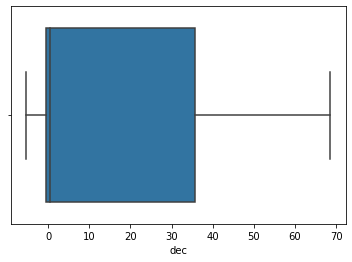

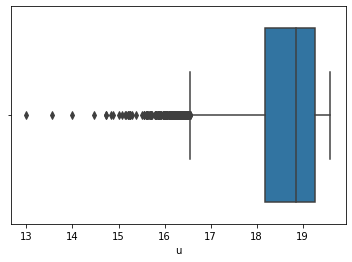

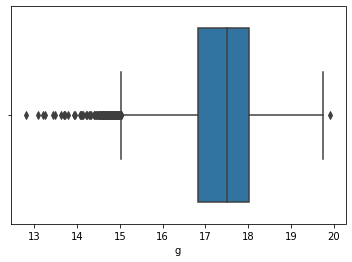

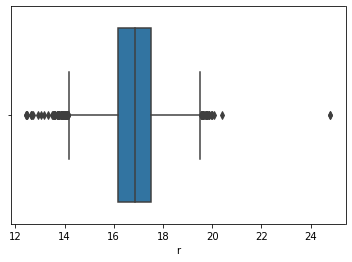

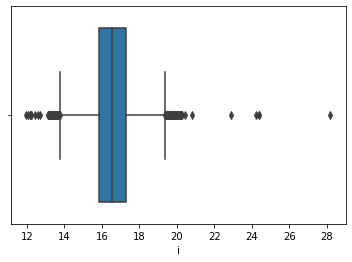

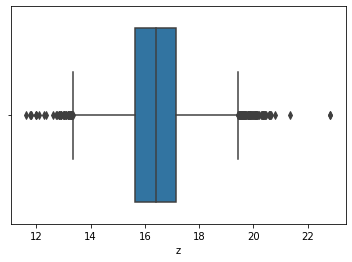

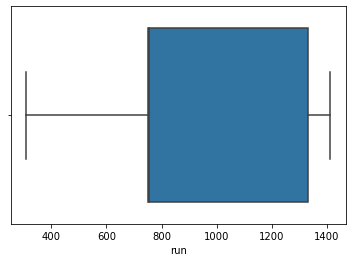

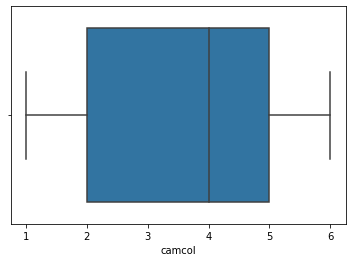

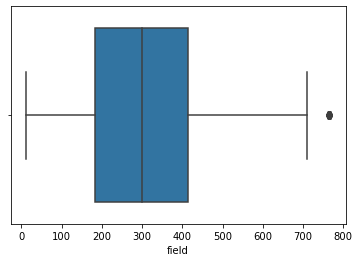

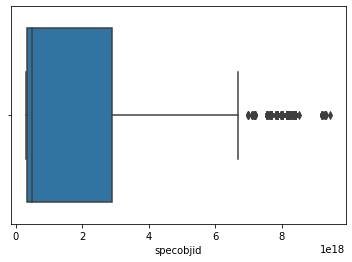

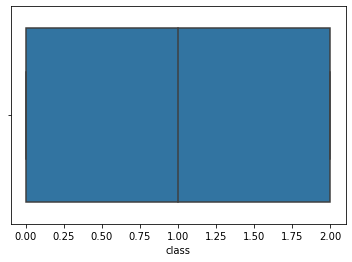

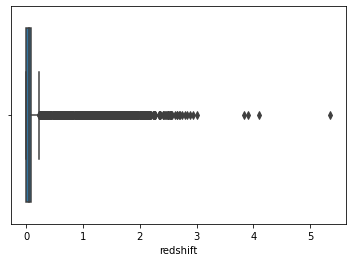

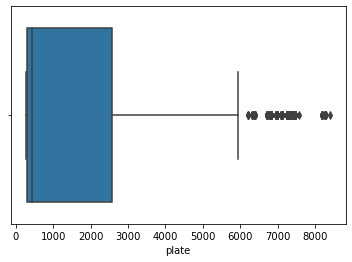

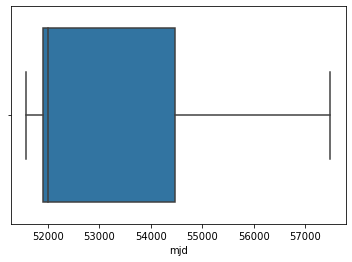

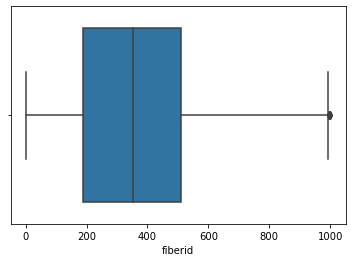

In [23]:
#Loop for checking outliers
for i in ds.columns:
    sns.boxplot((ds[i]))
    plt.show()

Observations:-
    
    1) Columns ra, u, g, r, i,z, field, specobjid,redshift,plate and fiberid contains outliers.

In [24]:
ds.shape

(10000, 16)

# Removing Outliers

In [25]:
from scipy.stats import zscore

In [26]:
z=np.abs(zscore(ds))
z

array([[0.16745842, 0.58492272, 1.03148637, ..., 1.03148936, 1.30931064,
        0.66863177],
       [0.16886159, 0.58311429, 0.05243046, ..., 0.63621258, 0.87919741,
        0.91101156],
       [0.17057433, 0.58347525, 0.92156796, ..., 0.65633905, 0.60919097,
        0.77527888],
       ...,
       [0.92039468, 1.46090664, 0.16753826, ..., 3.26608697, 2.69309363,
        1.3036668 ],
       [0.92197294, 1.46432109, 0.31801835, ..., 0.56688806, 0.70581092,
        0.60143828],
       [0.91804124, 1.46639319, 0.79229193, ..., 0.56688806, 0.70581092,
        0.5820479 ]])

In [27]:
threshold=3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9994, 9997, 9997], dtype=int64), array([12, 12, 12, ..., 13, 10, 13], dtype=int64))


In [28]:
ds_new=ds[(z<3).all(axis=1)]
ds_new

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,5.033460e+17,0,0.055515,447,51877,249
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0,0.117772,447,51877,228
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0,0.014019,447,51877,229


%age loss of data after removal of data is approx 8.6%. %age loss is on higher side, So we will keep outliers.

In [29]:
ds.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

All columns are highly skewed, we will use power transform method to remove skewness.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [31]:
x = ds.drop('class',axis = 1)

In [32]:
y= ds.iloc[:,11]

In [33]:
from sklearn.preprocessing import power_transform

In [34]:
#removing skewness
x= power_transform(x,method='yeo-johnson')

In [35]:
sc=StandardScaler()

x=sc.fit_transform(x)

In [36]:
# Loop for checking Best Random_State and Model

model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),
       AdaBoostClassifier(),GradientBoostingClassifier()]

max_accuscore=0
for rand in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=rand)
    for i in model:
        i.fit(x_train,y_train)
        y_pred=i.predict(x_test)
        accu_sco=accuracy_score(y_test,y_pred)
        if accu_sco > max_accuscore:
            max_accuscore = accu_sco
            final_state = rand
            final_model= i
        

print('max accu_score with random_state',final_state,'is',max_accuscore,'and model is',final_model)

max accu_score with random_state 59 is 0.9965 and model is GradientBoostingClassifier()


In [36]:
gbc=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=59)
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.995
[[1010    4    3]
 [   2  162    0]
 [   0    1  818]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1017
           1       0.97      0.99      0.98       164
           2       1.00      1.00      1.00       819

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      0.99      1.00      2000



In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
sc=cross_val_score(gbc,x,y,cv=10)
print('Cross Validation Score is = ',sc*100)
print('Mean is =',sc.mean()*100,'and Standard Deviation is =',sc.std())

Cross Validation Score is =  [99.  99.5 98.8 99.2 99.5 99.  98.5 98.8 99.1 98.8]
Mean is = 99.02 and Standard Deviation is = 0.0030265491900843136


In [53]:
import joblib

In [54]:
joblib.dump(gbc,'Skyserver.pkl')

['Skyserver.pkl']